<a href="https://colab.research.google.com/github/Abugahh/Network-Anomaly-Detection/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Understanding the dataset

## Cyber attack data

* The data is collected by the University of New South Wales (Australia). That includes records of different types of cyber attacks. The dataset contains network packets captured in the Cyber Range Lab of UNSW Canberra. The data is provided in two sets of training and testing data.

* The dataset includes nine types of attacks, including:

1. Fuzzers: Attack that involves sending random data to a system to test its resilience and identify any vulnerabilities.

2. Analysis: A type of attack that involves analyzing the system to identify its weaknesses and potential targets for exploitation.

3. Backdoors: Attack that involves creating a hidden entry point into a system for later use by the attacker.

4. DoS (Denial of Service): Attack that aims to disrupt the normal functioning of a system, making it unavailable to its users.

5. Exploits: Attack that leverages a vulnerability in a system to gain unauthorized access or control.

6. Generic: A catch-all category that includes a variety of different attack types that do not fit into the other categories.

7. Reconnaissance: Attack that involves gathering information about a target system, such as its vulnerabilities and potential entry points, in preparation for a future attack.

8. Shellcode: Attack that involves executing malicious code, typically in the form of shell scripts, on a target system.

9. Worms: A type of malware that spreads itself automatically to other systems, often causing harm in the process.

* These nine categories cover a wide range of attack types that can be used to exploit a system, and it is important to be aware of them to protect against potential security threats.

In [5]:
# ##Fetures reading columns
# import chardet
# import pandas as pd

# with open('NUSW-NB15_features (1).csv', 'rb') as f:
#   result = chardet.detect(f.read())
#   encoding = result['encoding']

# df = pd.read_csv('NUSW-NB15_features (1).csv', encoding=encoding)
import pandas as pd
df = pd.read_csv('Dataa/NUSW-NB15_features (1).csv')

df.head(49)

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol
5,6,state,nominal,Indicates to the state and its dependent proto...
6,7,dur,Float,Record total duration
7,8,sbytes,Integer,Source to destination transaction bytes
8,9,dbytes,Integer,Destination to source transaction bytes
9,10,sttl,Integer,Source to destination time to live value


In [1]:
import pandas as pd
import numpy as np


In [2]:
training = pd.read_csv('Dataa/UNSW_NB15_training-set (1).csv')
testing = pd.read_csv('Dataa/UNSW_NB15_testing-set (1).csv')

print("training ",training.shape)
print("testing ",testing.shape)

training  (82332, 45)
testing  (175341, 45)


In [18]:
df.loc[:, "tcprtt"].describe()

count    257673.000000
mean          0.046038
std           0.092908
min           0.000000
25%           0.000000
50%           0.000000
75%           0.082082
max           3.821465
Name: tcprtt, dtype: float64

In [19]:
df.to_csv("alpharat.csv")

In [5]:
df.head(1000)

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.000011,udp,-,INT,2,0,496,0,90909.090200,254,...,1,2,0,0,0,1,2,0,Normal,0
1,0.000008,udp,-,INT,2,0,1762,0,125000.000300,254,...,1,2,0,0,0,1,2,0,Normal,0
2,0.000005,udp,-,INT,2,0,1068,0,200000.005100,254,...,1,3,0,0,0,1,3,0,Normal,0
3,0.000006,udp,-,INT,2,0,900,0,166666.660800,254,...,1,3,0,0,0,2,3,0,Normal,0
4,0.000010,udp,-,INT,2,0,2126,0,100000.002500,254,...,1,3,0,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.183870,tcp,-,FIN,14,14,784,764,22.806559,254,...,1,3,0,0,0,2,4,0,Fuzzers,1
996,0.195360,tcp,http,FIN,10,6,1330,268,76.781325,254,...,1,1,0,0,1,1,1,0,Exploits,1
997,0.230088,tcp,http,FIN,10,10,816,5840,82.577103,62,...,1,1,0,0,1,1,1,0,Exploits,1
998,0.212793,tcp,http,FIN,12,20,876,19342,145.681489,62,...,1,1,0,0,1,2,1,0,DoS,1


In [4]:
#Concatinating the dataframe
df = pd.concat([training,testing]).drop('id',axis=1)
df = df.reset_index(drop=True)

df.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.000011,udp,-,INT,2,0,496,0,90909.0902,254,...,1,2,0,0,0,1,2,0,Normal,0
1,0.000008,udp,-,INT,2,0,1762,0,125000.0003,254,...,1,2,0,0,0,1,2,0,Normal,0
2,0.000005,udp,-,INT,2,0,1068,0,200000.0051,254,...,1,3,0,0,0,1,3,0,Normal,0
3,0.000006,udp,-,INT,2,0,900,0,166666.6608,254,...,1,3,0,0,0,2,3,0,Normal,0
4,0.000010,udp,-,INT,2,0,2126,0,100000.0025,254,...,1,3,0,0,0,2,3,0,Normal,0


In [4]:
# Count the number of null values in each column
# df.isnull().sum()

# Count the number of null values in each row
df.isnull().sum(axis=1)


0         0
1         0
2         0
3         0
4         0
         ..
257668    0
257669    0
257670    0
257671    0
257672    0
Length: 257673, dtype: int64

In [14]:
df.shape

(257673, 44)

In [15]:
df.dtypes


dur                  float64
proto                 object
service               object
state                 object
spkts                  int64
dpkts                  int64
sbytes                 int64
dbytes                 int64
rate                 float64
sttl                   int64
dttl                   int64
sload                float64
dload                float64
sloss                  int64
dloss                  int64
sinpkt               float64
dinpkt               float64
sjit                 float64
djit                 float64
swin                   int64
stcpb                  int64
dtcpb                  int64
dwin                   int64
tcprtt               float64
synack               float64
ackdat               float64
smean                  int64
dmean                  int64
trans_depth            int64
response_body_len      int64
ct_srv_src             int64
ct_state_ttl           int64
ct_dst_ltm             int64
ct_src_dport_ltm       int64
ct_dst_sport_l

In [16]:
## converting object/categorical data to numbers

for col in ['proto', 'service', 'state']:
      df[col] = df[col].astype('category').cat.codes
##.cat.codes attribute to replace the categorical values with numerical codes.

df['attack_cat'] = df['attack_cat'].astype('category') ##retains as cat

In [17]:
df.dtypes

dur                   float64
proto                   int16
service                  int8
state                    int8
spkts                   int64
dpkts                   int64
sbytes                  int64
dbytes                  int64
rate                  float64
sttl                    int64
dttl                    int64
sload                 float64
dload                 float64
sloss                   int64
dloss                   int64
sinpkt                float64
dinpkt                float64
sjit                  float64
djit                  float64
swin                    int64
stcpb                   int64
dtcpb                   int64
dwin                    int64
tcprtt                float64
synack                float64
ackdat                float64
smean                   int64
dmean                   int64
trans_depth             int64
response_body_len       int64
ct_srv_src              int64
ct_state_ttl            int64
ct_dst_ltm              int64
ct_src_dpo

attack_cat
Generic           58871
Exploits          44525
Fuzzers           24246
DoS               16353
Reconnaissance    13987
Analysis           2677
Backdoor           2329
Shellcode          1511
Worms               174
Normal                0
Name: count, dtype: int64


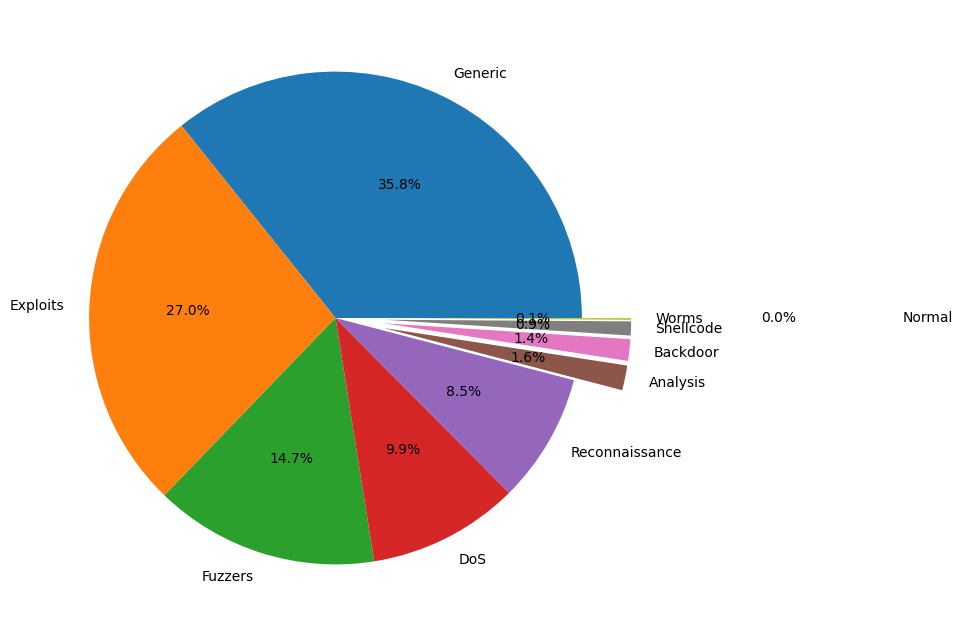

In [7]:
import matplotlib.pyplot as plt

validAttacks = df[df['label']==1]['attack_cat'].value_counts()
print(validAttacks)

#The subset is obtained by selecting the rows where the column label is equal to 1, and then selecting the column attack_cat. The value_counts() method returns a series that contains the frequency of each unique value in the column.

plt.figure(figsize = (15,8))
plt.pie(validAttacks,labels = validAttacks.index, autopct = '%1.1f%%',explode = [0,0,0,0,0,0.2,0.2,0.2,0.2,1.2])
plt.show()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257673 entries, 0 to 257672
Data columns (total 44 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   dur                257673 non-null  float64 
 1   proto              257673 non-null  int16   
 2   service            257673 non-null  int8    
 3   state              257673 non-null  int8    
 4   spkts              257673 non-null  int64   
 5   dpkts              257673 non-null  int64   
 6   sbytes             257673 non-null  int64   
 7   dbytes             257673 non-null  int64   
 8   rate               257673 non-null  float64 
 9   sttl               257673 non-null  int64   
 10  dttl               257673 non-null  int64   
 11  sload              257673 non-null  float64 
 12  dload              257673 non-null  float64 
 13  sloss              257673 non-null  int64   
 14  dloss              257673 non-null  int64   
 15  sinpkt             257673 non-null

In [8]:
from sklearn.model_selection import train_test_split

X = df.drop(columns = ['attack_cat', 'label']) ##all columns except 42 and 43 since were predicting the type of attack
y = df['label'].values ## predict whether it is 0 or 1  label column into a numpy array by values cause
#. A numpy array is more efficient and compatible for numerical computations than a pandas series

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

feature_names = list(X.columns)

print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (180371, 42)
y_train shape:  (180371,)
X_test shape:  (77302, 42)
y_test shape:  (77302,)


Models


Decision tree

In [9]:
##Decision trees
# Import modules
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Split data into training and test sets
X = df.drop(columns = ['attack_cat', 'label'])
y = df['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

# Create a decision tree model
dt = DecisionTreeClassifier(max_depth=10, criterion='gini', random_state=11)

# Fit the model to the training data
dt.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt.predict(X_test)

# Evaluate the performance of the model
#accuracy = accuracy_score(y_test, y_pred)
#rint("Accuracy: ", accuracy)

# Import modules
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test data
y_pred = dt.predict(X_test)

# Calculate and print the metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)


Accuracy:  0.9324467672246514
Precision:  0.9627236996153203
Recall:  0.9305084060782411
F1-score:  0.9463419646526922


Using gridsearch to find best paramaters

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2]
}

dt = DecisionTreeClassifier()

grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best recall score:", grid_search.best_score_)

# print all the parameters of the best estimator
print(grid_search.best_estimator_.get_params())



#accuracy = accuracy_score(y_test, y_pred) 
#precision = precision_score(y_test, y_pred)

#print("Accuracy score:" , accuracy) 
#print("Precision score:" , precision)

Best parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best recall score: 1.0
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 2, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


Root Node = Initial node (Has lowest entropy)
Decision node= internal node (child node)
Leaf Node = Termnal node

**max_depth**: This is the maximum depth of the tree. 
The depth of a node is the number of edges from the root to the node. The deeper the tree, the more complex the model, but also the more prone to overfitting. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.


**min_samples_leaf**: This is the minimum number of samples one specifies to term a given node as a leaf node so you dont want to split it further 
A leaf node is a node that has no children. If this value is larger, then the tree will have fewer leaves and will be less complex, but also less expressive1.

**min_samples_split**: This is the minimum number of samples required to split an internal node. An internal node is a node that has children. 
Samples include say motivation as a feature has samples like high,low,neutral
If this value is larger, then the tree will have fewer splits and will be less complex, but also less expressive1.
These parameters can be tuned using cross-validation or grid search to find the optimal values that balance between underfitting and overfitting


****max_features ****– it helps us decide what number of features to consider when looking for the best split.


The max_features parameter is the number of features to consider when looking for the best split. It can be an integer, a float, a string, or None. If None, then all features are considered. If an integer, then it is the number of features to consider. If a float, then it is a fraction of the number of features to consider. If a string, then it can be one of the following options:

‘auto’: This is equivalent to None, which means that all features are considered.
‘sqrt’: This is equivalent to the square root of the number of features to consider.
‘log2’: This is equivalent to the base 2 logarithm of the number of features to consider.




In [10]:
##Decision trees
# Import modules
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Split data into training and test sets
X = df.drop(columns = ['attack_cat', 'label'])
y = df['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

# Create a decision tree model
dt = DecisionTreeClassifier(max_depth=2, criterion='gini', random_state=11 , min_samples_leaf=1 ,min_samples_split=2)

#'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2

# Fit the model to the training data
dt.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)


Accuracy:  0.8714522263330833


In [15]:
# Import modules
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test data
y_pred = dt.predict(X_test)

# Calculate and print the metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)

Accuracy:  0.8714522263330833
Precision:  0.832780816154817
Recall:  1.0
F1-score:  0.9087620394259638


Using AUC AND roc to see if model is okay

AUC: 0.9011


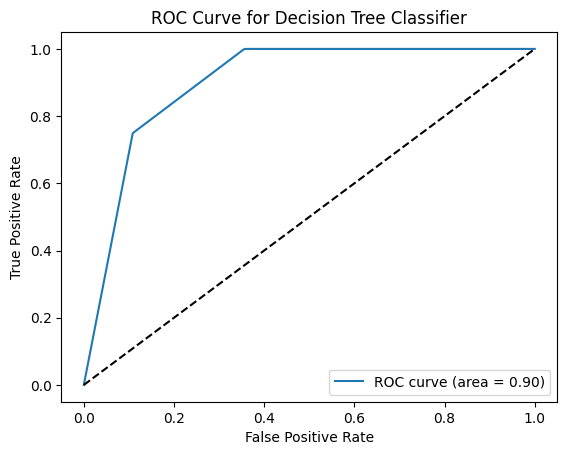

DecisionTreeClassifier(max_depth=2)


In [20]:
# import libraries
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# use the best estimator to predict probabilities on the test set
y_prob = grid_search.best_estimator_.predict_proba(X_test)[:, 1]

# calculate the false positive rate and true positive rate for different thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# calculate the area under the curve
auc = roc_auc_score(y_test, y_prob)
print(f'AUC: {auc:.4f}')

# plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree Classifier')
plt.legend(loc='lower right')
plt.show()


# print the best estimator
print(grid_search.best_estimator_)


ACC OF TRAIN

In [21]:
predictions_test=dt.predict(X_test)
accuracy_score(y_test, predictions_test)

##since its nearish to the test no overfitting can be seenn mmmmmhhh

0.9324467672246514

In [22]:
# Import modules
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test data
y_pred = dt.predict(X_test)

# Calculate and print the metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)


Accuracy:  0.9324467672246514
Precision:  0.9627236996153203
Recall:  0.9305084060782411
F1-score:  0.9463419646526922


Confusion matrix for Decision tree

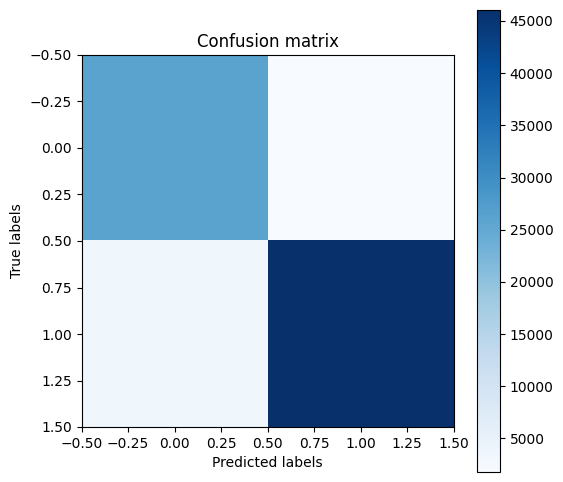

In [24]:
# Import modules
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Make predictions on the test data
y_pred = dt.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
plt.imshow(cm, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion matrix')
plt.colorbar()
plt.show()




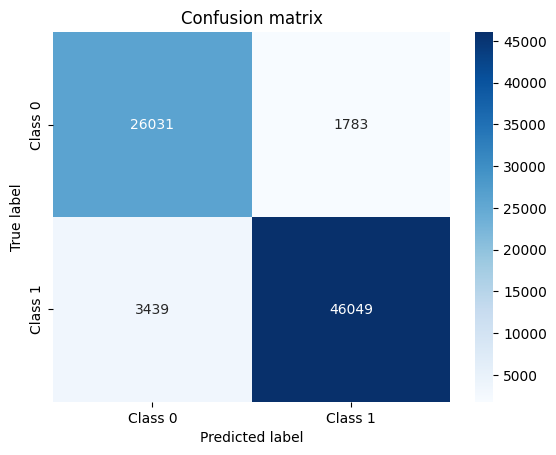

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# cm is your confusion matrix
sns.heatmap(cm, annot=True, fmt='g', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'], cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix')
plt.show()


Understanding rules present in the tree

In [16]:
# Import module
from sklearn.tree import export_text

# Get the textual representation of the decision tree
rules = export_text(dt, feature_names=feature_names)

# Print the rules to the console
print(rules)
##what each means

|--- sttl <= 61.00
|   |--- sinpkt <= 0.00
|   |   |--- class: 1
|   |--- sinpkt >  0.00
|   |   |--- class: 0
|--- sttl >  61.00
|   |--- synack <= 0.04
|   |   |--- class: 1
|   |--- synack >  0.04
|   |   |--- class: 1



In [14]:
df[["sttl", "smean", "proto"]].head(n=10000)


,sttl,smean,proto
0,254,248,119
1,254,881,119
2,254,534,119
3,254,450,119
4,254,1063,119
...,...,...,...
9995,254,102,113
9996,62,970,113
9997,62,80,113
9998,62,127,113



The numbers in your tree are the split values that are used to divide the dataset into two subsets based on whether the feature value is less than or equal to that number or greater than that number. The split values are randomly chosen from the minimum and maximum values of each feature in the dataset.

VISUALIZING RULES PRESENT USING TREES,GRAPHVITS AND DTREEVITZ

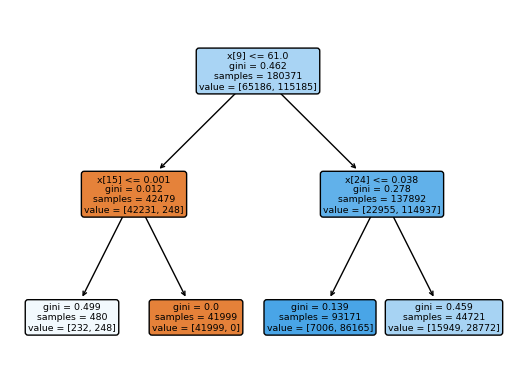

In [17]:
from sklearn import tree
# plt.figure(figsize=(100,140))
tree.plot_tree(dt,filled=True,rounded=True)
plt.show()

import sklearn.tree
import matplotlib.pyplot as plt

# clf is your decision tree classifier
# feature_names is a list of feature names
# class_names is a list of class names
# sklearn.tree.plot_tree(dt, feature_names=feature_names, class_names=class_names, filled=True, rounded=True)
# plt.show()


In [ ]:
import sklearn.tree
import graphviz

# clf is your decision tree classifier
# feature_names is a list of feature names
# class_names is a list of class names
dot_data = sklearn.tree.export_graphviz(df, feature_names=feature_names, filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph.render('tree') # this will save the image as tree.pdf in your current working directory
graph.view() # this will open the image in a separate window


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

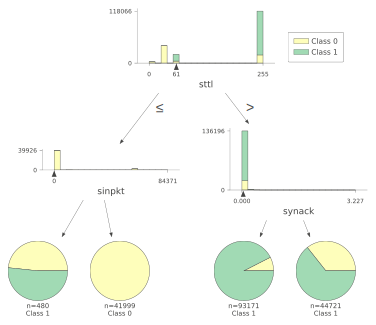

In [12]:
import dtreeviz

# clf is your decision tree classifier
# X_train and y_train are your training data and labels
# feature_names is a list of feature names
viz = dtreeviz.model(dt, X_train=X_train, y_train=y_train, feature_names=feature_names)
viz.view() # this will open the image in a separate window


In [41]:
import matplotlib.font_manager
fonts = set([f.name for f in matplotlib.font_manager.fontManager.ttflist])
print(fonts)


{'Bitstream Vera Sans Mono', 'Noto Sans Tifinagh Ghat', 'Noto Serif Grantha', 'Noto Sans Ol Chiki', 'Noto Rashi Hebrew', 'Noto Serif Tangut', 'URW Gothic', 'Noto Naskh Arabic', 'Standard Symbols PS', 'Noto Sans Lydian', 'Carlito', 'Noto Looped Thai', 'Noto Sans Bamum', 'Existence', 'Noto Sans Tifinagh APT', 'Chancery Uralic', 'Noto Sans Medefaidrin', 'Noto Sans SignWriting', 'Noto Sans Kaithi', 'Noto Sans Chakma', 'Noto Sans Tifinagh', 'Noto Sans Osmanya', 'STIXSizeFourSym', 'Noto Sans Meetei Mayek', 'Noto Sans Tifinagh Rhissa Ixa', 'Noto Sans Inscriptional Parthian', 'Noto Sans Tifinagh Adrar', 'Noto Sans Multani', 'Z003', 'Noto Looped Lao', 'Noto Sans Khudawadi', 'Noto Sans Tamil', 'msam10', 'Noto Serif Tamil Slanted', 'Noto Serif Yezidi', 'STIXGeneral', 'Noto Sans Kannada', 'Noto Sans Malayalam', 'Noto Sans Khojki', 'Dinreg', 'Noto Sans Siddham', 'Roman Uralic', 'Noto Sans Bassa Vah', 'Noto Sans Hanunoo', 'DejaVu Sans Display', 'Noto Sans Tai Viet', 'C059', 'Noto Sans Duployan', 'P0

In [42]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'DejaVu Serif Display'  # Or any other available font


In [ ]:
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

clf=grid_search.best_estimator_
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

recall = recall_score(y_test, y_pred)
print("Recall: ", recall)

In [ ]:
from sklearn.tree import export_text
import dtreeviz

print(":::::::> The RULES FOR HIGH RECALL RATE <::::::: \n" ,export_text(clf,feature_names=feature_names))

viz_model = dtreeviz.model(clf,
                           X_train=X_train, y_train=y_train, 
                           feature_names=feature_names)  
viz_model.view()

In [ ]:
# Import module
import matplotlib.pyplot as plt

# Get the feature importance values
feature_importance = dt.feature_importances_

# Plot the feature importance values
plt.figure(figsize=(15, 10))
plt.bar(feature_names, feature_importance)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature importance')
plt.show()


Random Forest

In [19]:
# Create a random forest model

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators=100, max_depth=10, criterion='gini', random_state=11)

# Fit the model to the training data
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.9343225272308607


In [21]:
# Import modules
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Split data into training and test sets
X = df.drop(columns = ['attack_cat', 'label']) # Drop the columns that are not used as features
y = df['label'].values # Convert the label column to a numpy array

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11) # Use 30% of the data for testing and 70% for training

# Create an imputer object with mean strategy
imputer = SimpleImputer(strategy='mean') # Replace the missing values with the mean of each column

# Fit the imputer object to the training data
imputer.fit(X_train)

# Transform both the training and test data
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

# Create a random forest model
rf = RandomForestClassifier(n_estimators=200, max_depth=15, criterion='entropy', random_state=11) # Use 200 trees, 15 levels of depth, entropy as the impurity measure, and a fixed seed for reproducibility

# Fit the model to the training data
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred) # Use accuracy as the metric to measure how well the model predicts the labels
print("Accuracy: ", accuracy)


Accuracy:  0.941165817184549


In [26]:
from sklearn.tree import export_text
feature_names = list(X.columns)

print(export_text(rf.estimators_[99],feature_names=feature_names))

|--- ct_dst_sport_ltm <= 2.50
|   |--- dmean <= 75.50
|   |   |--- proto <= 119.50
|   |   |   |--- sttl <= 61.00
|   |   |   |   |--- smean <= 58.50
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- smean >  58.50
|   |   |   |   |   |--- sttl <= 0.50
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- sttl >  0.50
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |--- sttl >  61.00
|   |   |   |   |--- ct_dst_src_ltm <= 1.50
|   |   |   |   |   |--- tcprtt <= 0.11
|   |   |   |   |   |   |--- sbytes <= 105.00
|   |   |   |   |   |   |   |--- sbytes <= 88.00
|   |   |   |   |   |   |   |   |--- sbytes <= 77.00
|   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |   |--- sbytes >  77.00
|   |   |   |   |   |   |   |   |   |--- dur <= 0.00
|   |   |   |   |   |   |   |   |   |   |--- proto <= 47.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |   |   |   |--- proto >  47.00
|   |   |   |   |   |

Random forest using best paramaters

In [30]:
# Import the necessary modules
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score

# Define the estimator
rf = RandomForestClassifier(random_state=11)

# Define the parameter grid
param_grid = {
    'n_estimators': [10],
    'max_depth': [5],
    'criterion': ['gini'],
    'class_weight': [None, 'balanced']
}

# Define the scoring function
scoring = 'recall'

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring=scoring, cv=5, verbose=1, n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Make predictions on the test data
y_pred = grid_search.predict(X_test)

# Evaluate the recall on the test data
recall = recall_score(y_test, y_pred)
print("Recall: ", recall)

# Calculate and print the metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("F1-score: ", f1)


Fitting 5 folds for each of 2 candidates, totalling 10 fits


Best parameters:  {'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'n_estimators': 10}
Best score:  0.9995485523288622
Recall:  0.9995958616230197
Accuracy:  0.8947245866859849
Precision:  0.8590282360295906
F1-score:  0.9239964884098848


Printing one tree

In [15]:
rf_best = grid_search.best_estimator_
from sklearn.tree import export_text
feature_names = list(X.columns)

#n-estimatores 10 trees
print(export_text(rf_best.estimators_[9],feature_names=feature_names))

|--- sload <= 40380952.00
|   |--- sttl <= 61.00
|   |   |--- sbytes <= 62.50
|   |   |   |--- ct_srv_dst <= 2.50
|   |   |   |   |--- proto <= 38.50
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- proto >  38.50
|   |   |   |   |   |--- class: 1.0
|   |   |   |--- ct_srv_dst >  2.50
|   |   |   |   |--- ct_srv_src <= 2.50
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- ct_srv_src >  2.50
|   |   |   |   |   |--- class: 1.0
|   |   |--- sbytes >  62.50
|   |   |   |--- class: 0.0
|   |--- sttl >  61.00
|   |   |--- service <= 0.50
|   |   |   |--- dur <= 1.18
|   |   |   |   |--- ct_state_ttl <= 2.50
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- ct_state_ttl >  2.50
|   |   |   |   |   |--- class: 0.0
|   |   |   |--- dur >  1.18
|   |   |   |   |--- swin <= 127.50
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- swin >  127.50
|   |   |   |   |   |--- class: 1.0
|   |   |--- service >  0.50
|   |   |   |--- ct_srv_dst <= 1.50
|   |   |   |   |--- s

Printing all treess

In [16]:
rf_best = grid_search.best_estimator_
from sklearn.tree import export_text
feature_names = list(X.columns)

# Loop over all the trees in the forest
for i, estimator in enumerate(rf_best.estimators_):
    print(f"Tree {i}:")
    print(export_text(estimator, feature_names=feature_names))
    print("\n")


Tree 0:
|--- rate <= 18824.77
|   |--- dur <= 0.16
|   |   |--- ct_dst_sport_ltm <= 2.50
|   |   |   |--- dttl <= 46.00
|   |   |   |   |--- dpkts <= 0.50
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- dpkts >  0.50
|   |   |   |   |   |--- class: 0.0
|   |   |   |--- dttl >  46.00
|   |   |   |   |--- dload <= 5189.44
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- dload >  5189.44
|   |   |   |   |   |--- class: 1.0
|   |   |--- ct_dst_sport_ltm >  2.50
|   |   |   |--- ct_srv_dst <= 13.50
|   |   |   |   |--- dmean <= 21.50
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- dmean >  21.50
|   |   |   |   |   |--- class: 1.0
|   |   |   |--- ct_srv_dst >  13.50
|   |   |   |   |--- ct_dst_ltm <= 19.00
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- ct_dst_ltm >  19.00
|   |   |   |   |   |--- class: 0.0
|   |--- dur >  0.16
|   |   |--- sttl <= 47.00
|   |   |   |--- class: 0.0
|   |   |--- sttl >  47.00
|   |   |   |--- dmean <= 65.50
|   |   |   | 

If your random forest has 10 trees, it makes a decision by following these steps:

For each tree, it passes the input data through the branches and reaches a leaf node that has a prediction value.
It collects the prediction values of all 10 trees and averages them to get the final output.
If the output is a continuous value, such as a regression problem, it simply takes the mean of the 10 prediction values.
If the output is a categorical value, such as a classification problem, it takes the mode of the 10 prediction values, i.e., the most frequent class among them.

#Visualizing the tree

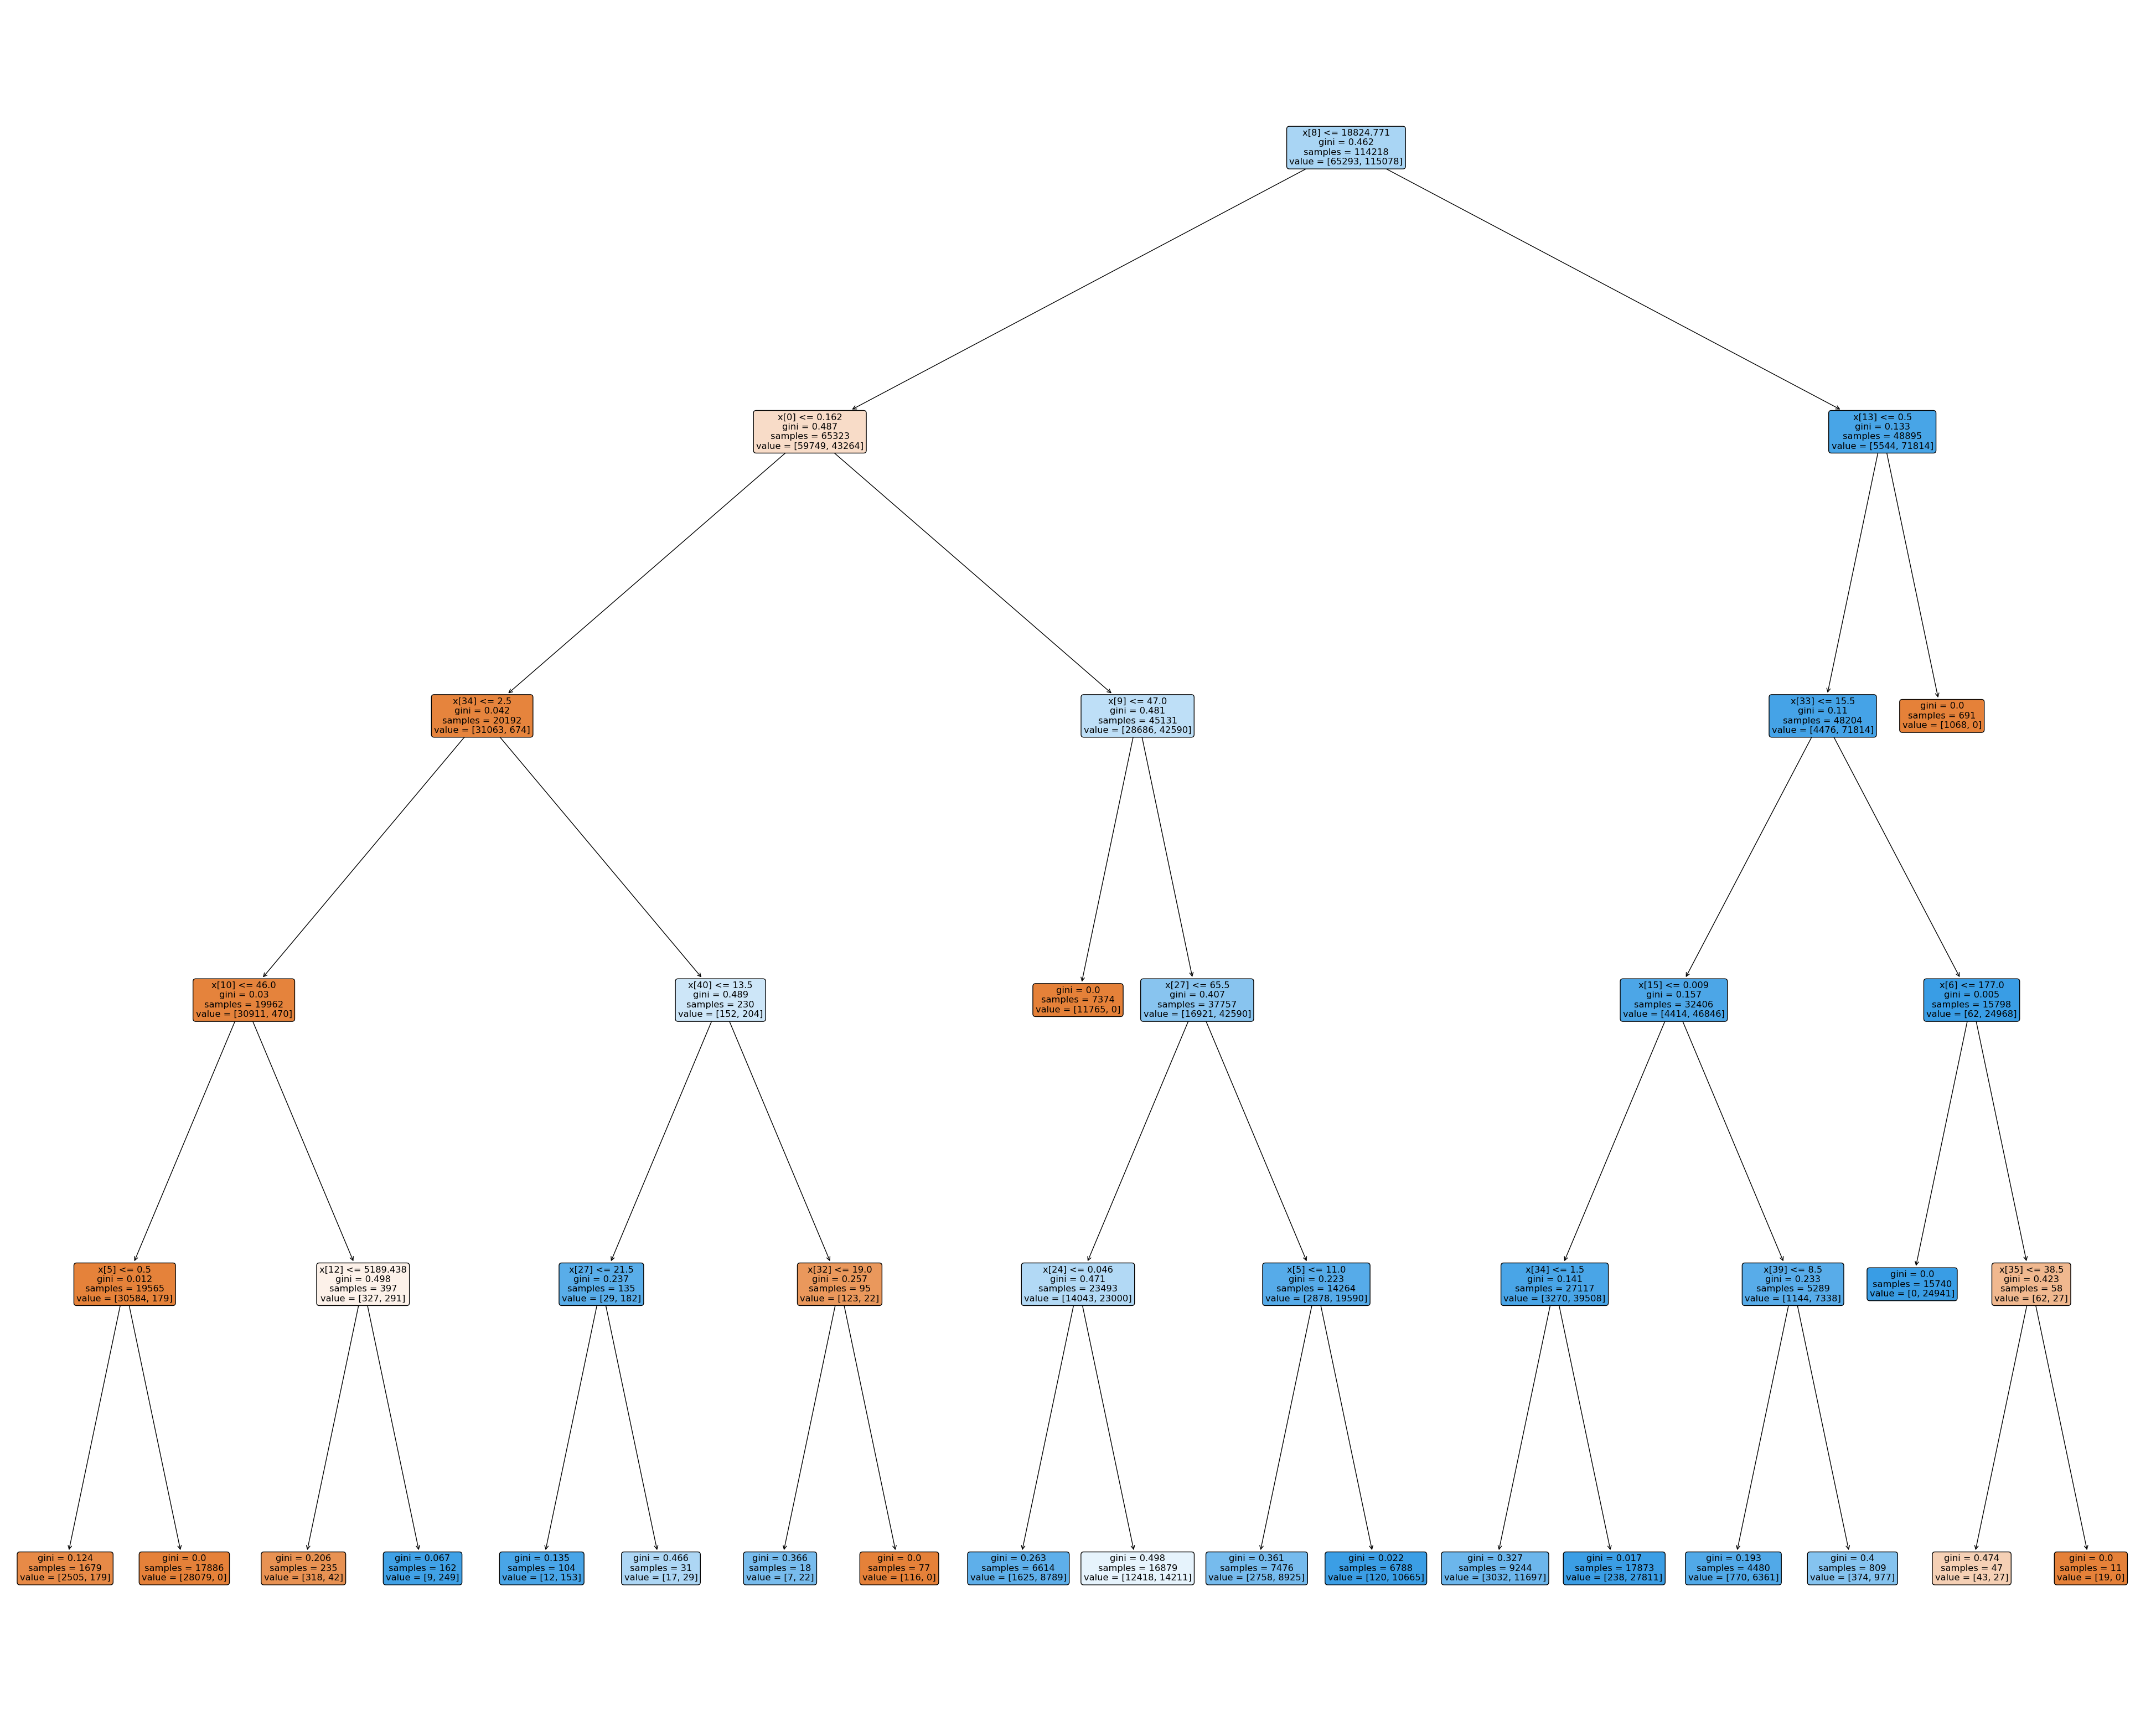

In [17]:
#visiualizing one tree
import sklearn.tree
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(50,40))
plt.rcParams.update({'font.size': 15})

tree.plot_tree(rf_best.estimators_[0], filled=True, rounded=True)
plt.show()



findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

:::::::> The RULES FOR HIGH RECALL RATE <::::::: 
 |--- rate <= 18824.77
|   |--- dur <= 0.16
|   |   |--- ct_dst_sport_ltm <= 2.50
|   |   |   |--- dttl <= 46.00
|   |   |   |   |--- dpkts <= 0.50
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- dpkts >  0.50
|   |   |   |   |   |--- class: 0.0
|   |   |   |--- dttl >  46.00
|   |   |   |   |--- dload <= 5189.44
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- dload >  5189.44
|   |   |   |   |   |--- class: 1.0
|   |   |--- ct_dst_sport_ltm >  2.50
|   |   |   |--- ct_srv_dst <= 13.50
|   |   |   |   |--- dmean <= 21.50
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- dmean >  21.50
|   |   |   |   |   |--- class: 1.0
|   |   |   |--- ct_srv_dst >  13.50
|   |   |   |   |--- ct_dst_ltm <= 19.00
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- ct_dst_ltm >  19.00
|   |   |   |   |   |--- class: 0.0
|   |--- dur >  0.16
|   |   |--- sttl <= 47.00
|   |   |   |--- class: 0.0
|   |   |--- sttl >  47.00
|  

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

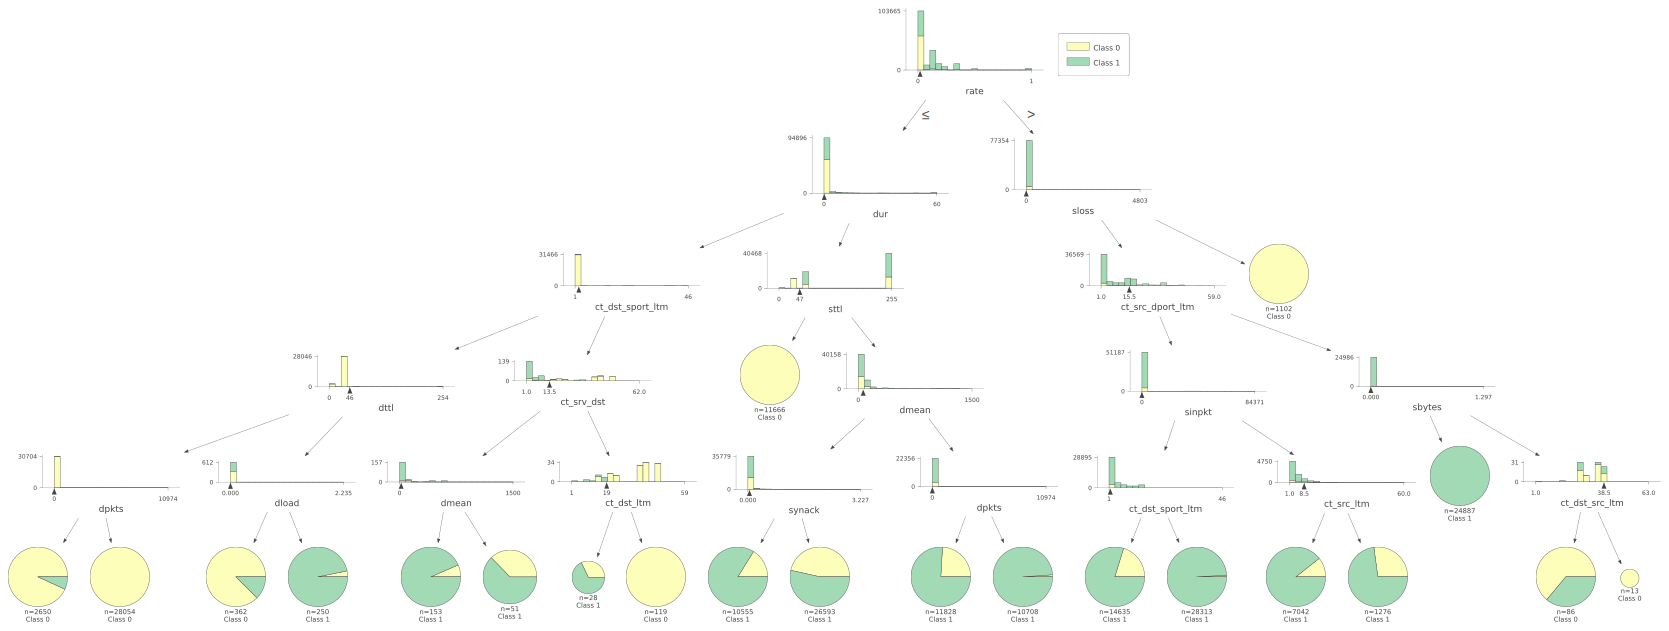

In [49]:
#visualising all trees

from sklearn.tree import export_text
import dtreeviz

from sklearn.tree import export_text

# Assuming rf_best is your trained RandomForestClassifier
# Get the first decision tree from the random forest
decision_tree = rf_best.estimators_[0]

print(":::::::> The RULES FOR HIGH RECALL RATE <::::::: \n" ,export_text(decision_tree, feature_names=feature_names))


viz_model = dtreeviz.model(decision_tree,
                           X_train=X_train, y_train=y_train, 
                           feature_names=feature_names)  
viz_model.view()
#

# viz_model = dtreeviz.model(rf_best,tree_index=1,
#                            X_train=X_train, y_train=y_train, 
#                            feature_names=feature_names)  
# viz_model.view()

In [18]:
##feature importance in each tree

for i, estimator in enumerate(rf_best.estimators_):
    print(f"Estimator {i}:")
    for feature, importance in zip(feature_names, estimator.feature_importances_):
        print(f"{feature}: {importance}")
    print("\n")


Estimator 0:
dur: 0.26447755314781407
proto: 0.0
service: 0.0
state: 0.0
spkts: 0.0
dpkts: 0.010685495066621198
sbytes: 0.0015607087667940578
dbytes: 0.0
rate: 0.4140256178457461
sttl: 0.1824492696625881
dttl: 0.004751543444296887
sload: 0.0
dload: 0.003923388616239209
sloss: 0.03384481342033007
dloss: 0.0
sinpkt: 0.000876450462501314
dinpkt: 0.0
sjit: 0.0
djit: 0.0
swin: 0.0
stcpb: 0.0
dtcpb: 0.0
dwin: 0.0
tcprtt: 0.0
synack: 0.02613893089289642
ackdat: 0.0
smean: 0.0
dmean: 0.03206850802478793
trans_depth: 0.0
response_body_len: 0.0
ct_srv_src: 0.0
ct_state_ttl: 0.0
ct_dst_ltm: 0.0004841866774544622
ct_src_dport_ltm: 0.0042658214136618924
ct_dst_sport_ltm: 0.017617975900470068
ct_dst_src_ltm: 8.062478460546101e-05
is_ftp_login: 0.0
ct_ftp_cmd: 0.0
ct_flw_http_mthd: 0.0
ct_src_ltm: 0.0011743544002941735
ct_srv_dst: 0.0015747574728985948
is_sm_ips_ports: 0.0


Estimator 1:
dur: 0.0005371334884165686
proto: 0.0
service: 0.004748823204827169
state: 0.3497745904812164
spkts: 0.00288075843

USING A DECISION TREE TO GET BEST FETURES TO USE

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Define the parameter grid
# param_grid = {
#     'criterion': ['gini', 'entropy'],
#     'max_depth': [2, 4],
#     'min_samples_split': [2, 4],
#     'min_samples_leaf': [1, 2]
# }

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}

# Create a decision tree classifier
dt = DecisionTreeClassifier()

# Create the grid search object
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='recall')

# Fit the grid search
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best recall score:", grid_search.best_score_)

# Get the best estimator
best_dt = grid_search.best_estimator_

# Print all the parameters of the best estimator
print(best_dt.get_params())

# Use the best estimator to make predictions on the test set
y_pred = best_dt.predict(X_test)

# Calculate accuracy, precision and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print the scores
print("Accuracy score:", accuracy)
print("Precision score:", precision)
print("Recall score:", recall)

#Best parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}


Best parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best recall score: 1.0
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 2, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
Accuracy score: 0.8714522263330833
Precision score: 0.832780816154817
Recall score: 1.0


In [27]:
feature_imp = pd.DataFrame({'Name':X.columns, 'Importance':best_dt.feature_importances_})

#The importance score is a measure of how much a feature contributes to the prediction of the target variable. The code then sorts the DataFrame by the importance score in descending order and resets the index. 

feature_imp = feature_imp.sort_values('Importance',ascending=False).reset_index(drop=True)

feature_imp[:10].style.background_gradient()

,Name,Importance
0,sttl,0.898250
1,synack,0.096635
2,sinpkt,0.005115
3,service,0.000000
4,proto,0.000000
5,state,0.000000
6,dpkts,0.000000
7,sbytes,0.000000
8,spkts,0.000000
9,dur,0.000000


FEATURE SELECTION



* To improve our understanding of the variables involved in cyber attack detection, we need to analyze the network data. 
Correlation diagrams can be helpful in visualizing how different variables are associated with each other and with cyber attacks. Additionally, random forest models can help identify the importance of different features in predicting the target variable (cyber attacks). We can compare the feature rankings from the random forest with the results of the correlation analysis to gain a better understanding of the key features to focus on for effective cyber attack detection.

*To create the correlation diagram, you need to calculate the correlation coefficients between the features and the target variable. 
The correlation coefficient is a measure of the linear relationship between two variables. It ranges from -1 to 1, where -1 means a perfect negative correlation, 0 means no correlation, and 1 means a perfect positive correlation. You can use the corr() method of pandas DataFrame to calculate the correlation coefficients. You can also specify the method of correlation, such as Pearson, Spearman, or Kendall. For example, you can use Pearson’s correlation like this:**

In [45]:

print(np.array(df.columns))
print(df.shape[1])




['dur' 'proto' 'service' 'state' 'spkts' 'dpkts' 'sbytes' 'dbytes' 'rate'
 'sttl' 'dttl' 'sload' 'dload' 'sloss' 'dloss' 'sinpkt' 'dinpkt' 'sjit'
 'djit' 'swin' 'stcpb' 'dtcpb' 'dwin' 'tcprtt' 'synack' 'ackdat' 'smean'
 'dmean' 'trans_depth' 'response_body_len' 'ct_srv_src' 'ct_state_ttl'
 'ct_dst_ltm' 'ct_src_dport_ltm' 'ct_dst_sport_ltm' 'ct_dst_src_ltm'
 'is_ftp_login' 'ct_ftp_cmd' 'ct_flw_http_mthd' 'ct_src_ltm' 'ct_srv_dst'
 'is_sm_ips_ports' 'attack_cat' 'label']
44


In [55]:
# import matplotlib.pyplot as plt

# plt.rcParams['font.sans-serif'] = 'SimHei'  # or any other font that you have and supports these glyphs
# plt.rcParams['axes.unicode_minus'] = False  # solves a common issue with displaying negative numbers


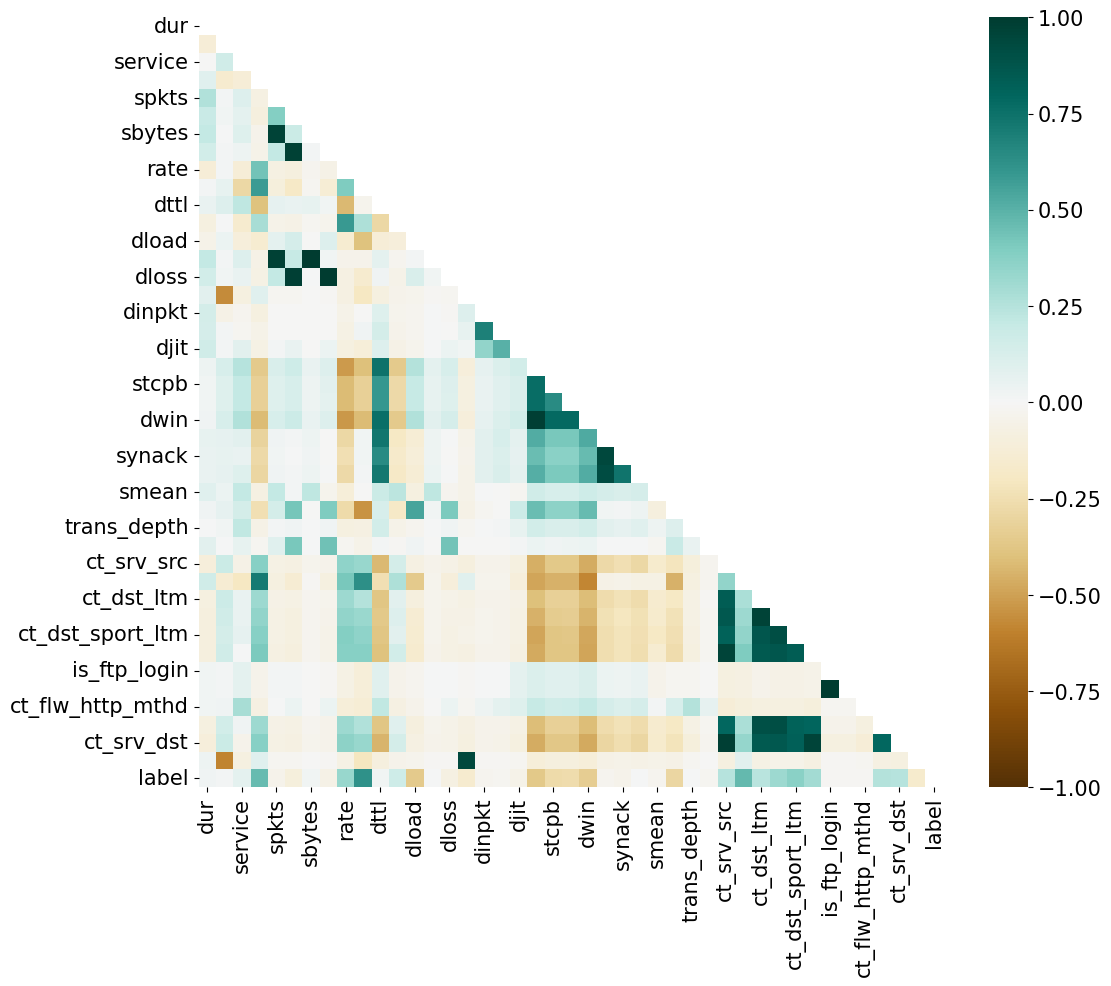

In [19]:

import seaborn as sns

import matplotlib.pyplot as plt


df_numeric = df.select_dtypes(include=np.number)
#selects only the columns in df that have a numeric data type (like int or float), and stores them in a new DataFrame df_numeric


plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(df_numeric.corr()))
#This line creates a mask for the upper triangle of the correlation matrix. This is done because the correlation matrix is symmetric, and we don’t need to display the same information twice.
sns.heatmap(df_numeric.corr(),vmin=-1, vmax=1,cmap='BrBG', mask=mask)

#The vmin and vmax arguments set the color scale to range from -1 to 1, which is the range of possible correlation values.
plt.show()






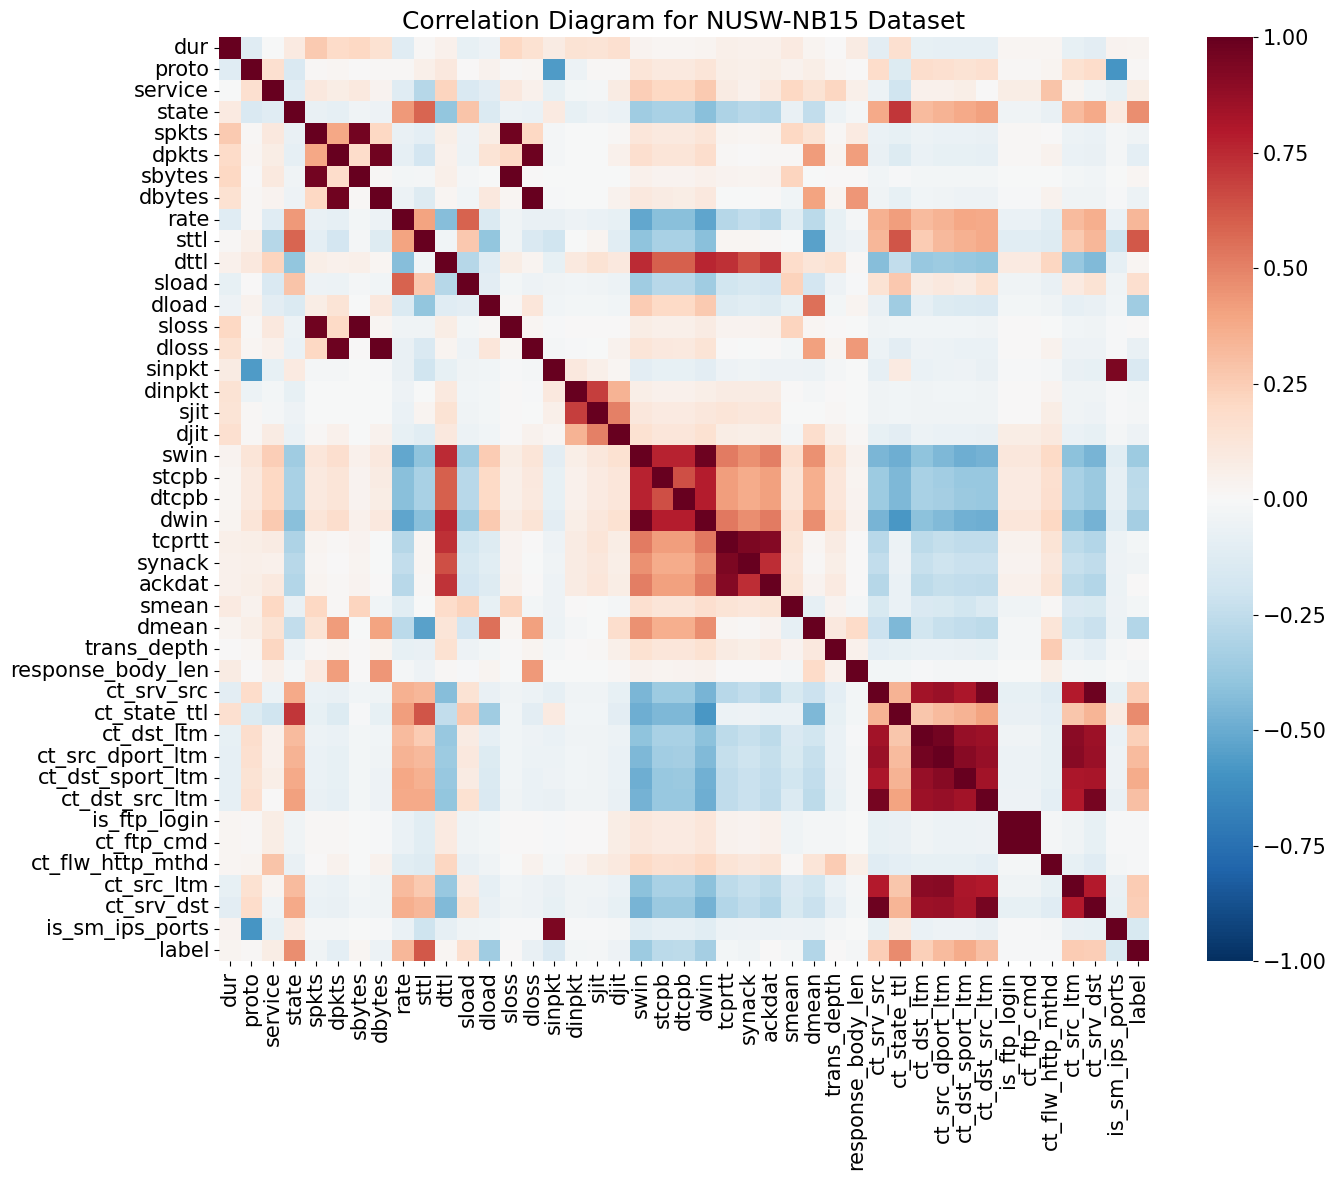

In [20]:

# select only the numeric columns
df_numeric = df.select_dtypes(include=np.number)

# calculate the correlation coefficients
corr = df_numeric.corr(method="pearson")

# plot the heatmap
plt.figure(figsize=(15,12))
# sns.heatmap(corr, annot=True, cmap="RdBu_r", vmin=-1, vmax=1) ##annot w values true
sns.heatmap(corr, annot=False, cmap="RdBu_r", vmin=-1, vmax=1)  ##annot without values false
plt.title("Correlation Diagram for NUSW-NB15 Dataset")
plt.show()


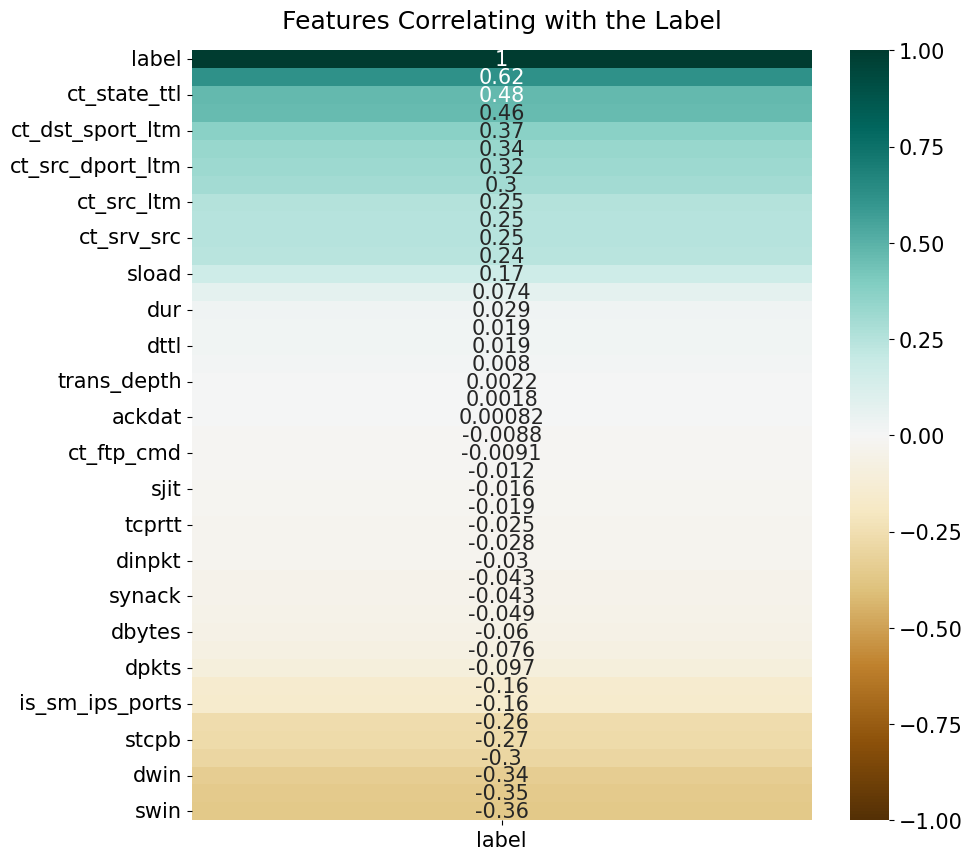

In [22]:
# Select only the numeric columns
df_numeric = df.select_dtypes(include=np.number)

# Calculate the correlation coefficients
corr = df_numeric.corr(method="pearson")

# Plot the heatmap
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(corr[['label']].sort_values(by='label', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with the Label', fontdict={'fontsize':18}, pad=16)
plt.show()



The following variables are positively correlated with cyber attacks:

    sttl: Source to destination time to live value.
    ct_state_ttl and state: These features reflect various stages of TCP connections and may be related to port scanning, SYN flood, or DDoS attacks.
    ct_dst_sport_ltm: This feature measures the number of connections from the same source IP to the same destination port in a short time period.
    rate: This feature may represent various types of traffic rates or frequencies.

The following variables are negatively correlated with cyber attacks:

    swin
    dload

For example, you can see that sttl has a moderate positive correlation with the target variable (0.51), which means that sttl is a relevant feature for predicting cyber attacks. Sttl stands for source to destination time to live value, which is a measure of how long a packet can travel before it expires. A higher sttl value may indicate that the packet has been tampered with or spoofed by an attacker. On the other hand, dttl has a moderate negative correlation with the target variable (-0.51), which means that dttl is also a relevant feature for predicting cyber attacks, but in the opposite direction. Dttl stands for destination to source time to live value, which is a measure of how long a packet can travel back from its destination

A negative correlation means that the variables tend to move in opposite directions, i.e., when one variable increases, the other variable decreases, and vice versa. For example, swin stands for source TCP window advertisement value, which is a measure of how much data the source can receive at a time. A lower swin value may indicate that the source is congested or under attack, and thus less likely to be involved in cyber attacks. On the other hand, dload stands for destination bits per second, which is a measure of how much data the destination receives per second. A higher dload value may indicate that the destination is receiving a lot of normal traffic, and thus less likely to be involved in cyber attacks.

In predicting whether a packet is an anomaly or not, negatively correlated variables can help by providing information about the normal behavior or characteristics of the network traffic. However, they may not be very effective in distinguishing between different types of cyber attacks, as they may have similar values for different attack categories.

If you want to reduce the number of features you have, it may be advisable to pick only the ones that strongly correlate with cyber attacks, as they may have more predictive power and relevance for classification.

Swin and dload are two features that are used to detect network anomalies and cyber attacks. Swin is the average number of bytes in each direction of a TCP flow, and dload is the number of payload bytes downloaded in the server-to-client direction. These features are negatively correlated with cyber attacks because they indicate normal network traffic patterns.

According to a research paper1, Swin and dload are among the top 10 most important features for identifying network anomalies using a random forest classifier. The paper states that "the average number of bytes in each direction of a TCP flow (swin) is an important feature to detect network anomalies, since it can reflect the size and frequency of data transmission. The number of payload bytes downloaded in the server-to-client direction (dload) is also an important feature, since it can indicate the amount of information exchanged between the two parties."1

In [25]:


feature_imp = pd.DataFrame({'Name':X.columns, 'Importance':rf_best.feature_importances_})

#The importance score is a measure of how much a feature contributes to the prediction of the target variable. The code then sorts the DataFrame by the importance score in descending order and resets the index. 

feature_imp = feature_imp.sort_values('Importance',ascending=False).reset_index(drop=True)

feature_imp[:10].style.background_gradient()



,Name,Importance
0,dload,0.152056
1,ct_state_ttl,0.134943
2,rate,0.092737
3,sttl,0.074628
4,sload,0.067656
5,dinpkt,0.051100
6,smean,0.046660
7,tcprtt,0.045710
8,state,0.041650
9,dbytes,0.039813


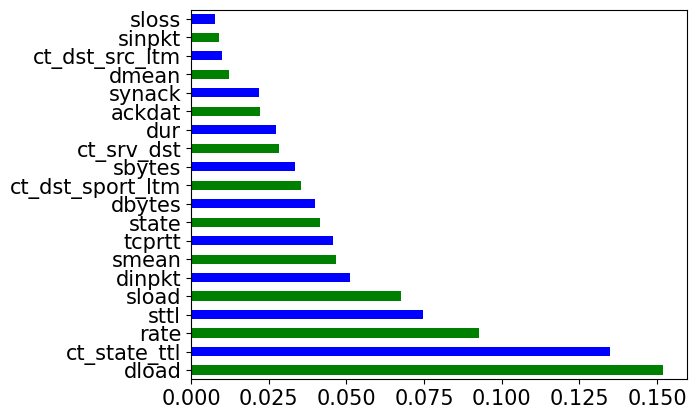

In [24]:
feat_importances = pd.Series(rf_best.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh',color=['g','b']*5)
plt.show()

correlating the important features from classifier with correlation

In [26]:


top10= feature_imp.Name[:10].tolist()
top10



['dload',
 'ct_state_ttl',
 'rate',
 'sttl',
 'sload',
 'dinpkt',
 'smean',
 'tcprtt',
 'state',
 'dbytes']

In [32]:


from sklearn.metrics import classification_report

X = df[top10]
y = df['label'].values

rf_top10 = grid_search.best_estimator_


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

rf_top10.fit(X_train, y_train)

y_pred = rf_top10.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

report = classification_report(y_test, y_pred)
print(report)


Accuracy:  0.8947245866859849
              precision    recall  f1-score   support

           0       1.00      0.71      0.83     27814
           1       0.86      1.00      0.92     49488

    accuracy                           0.89     77302
   macro avg       0.93      0.85      0.88     77302
weighted avg       0.91      0.89      0.89     77302



class 0 and class 1 refer to the two classes that your model is trying to predict. class 0 represents the normal network activities, while class 1 represents the abnormal network activities 1

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

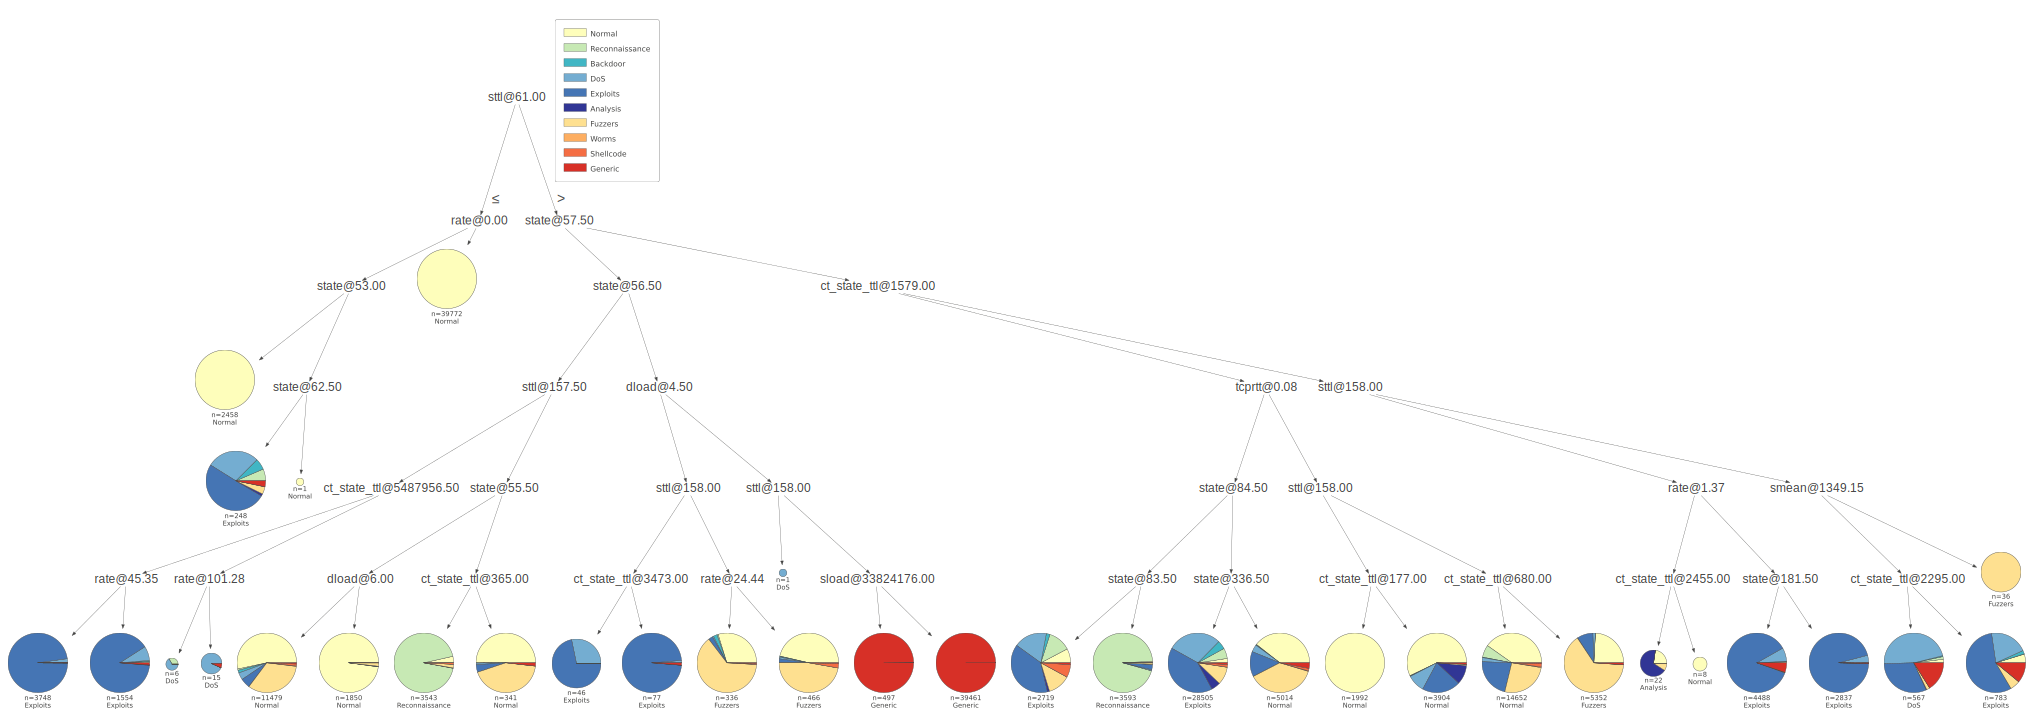

In [51]:
top10= feature_imp.Name[:10].tolist()

attack_names = np.array(df['attack_cat'].unique())

X_top = df.loc[:, df.columns.isin(top10)]
y_top = pd.factorize(df['attack_cat'])[0]


clf_top10 = DecisionTreeClassifier(max_depth=6)

X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(X_top, y_top, test_size=0.3, random_state=11)

clf_top10.fit(X_train_top, y_train_top)

viz_model = dtreeviz.model(clf_top10,
                           X_train=X_train_top, y_train=y_train_top, 
                           class_names=attack_names,
                           feature_names=top10)

viz_model.view(fancy=False,scale=1)



Accuracy:  0.8111821168921891
                precision    recall  f1-score   support

      Analysis       0.79      0.09      0.15       768
      Backdoor       0.79      0.08      0.15       658
           DoS       0.48      0.09      0.15      4909
      Exploits       0.61      0.90      0.72     13403
       Fuzzers       0.63      0.51      0.56      7283
       Generic       1.00      0.98      0.99     17790
        Normal       0.88      0.93      0.90     27814
Reconnaissance       0.88      0.74      0.81      4198
     Shellcode       0.42      0.26      0.32       418
         Worms       0.65      0.25      0.36        61

      accuracy                           0.81     77302
     macro avg       0.71      0.48      0.51     77302
  weighted avg       0.81      0.81      0.79     77302



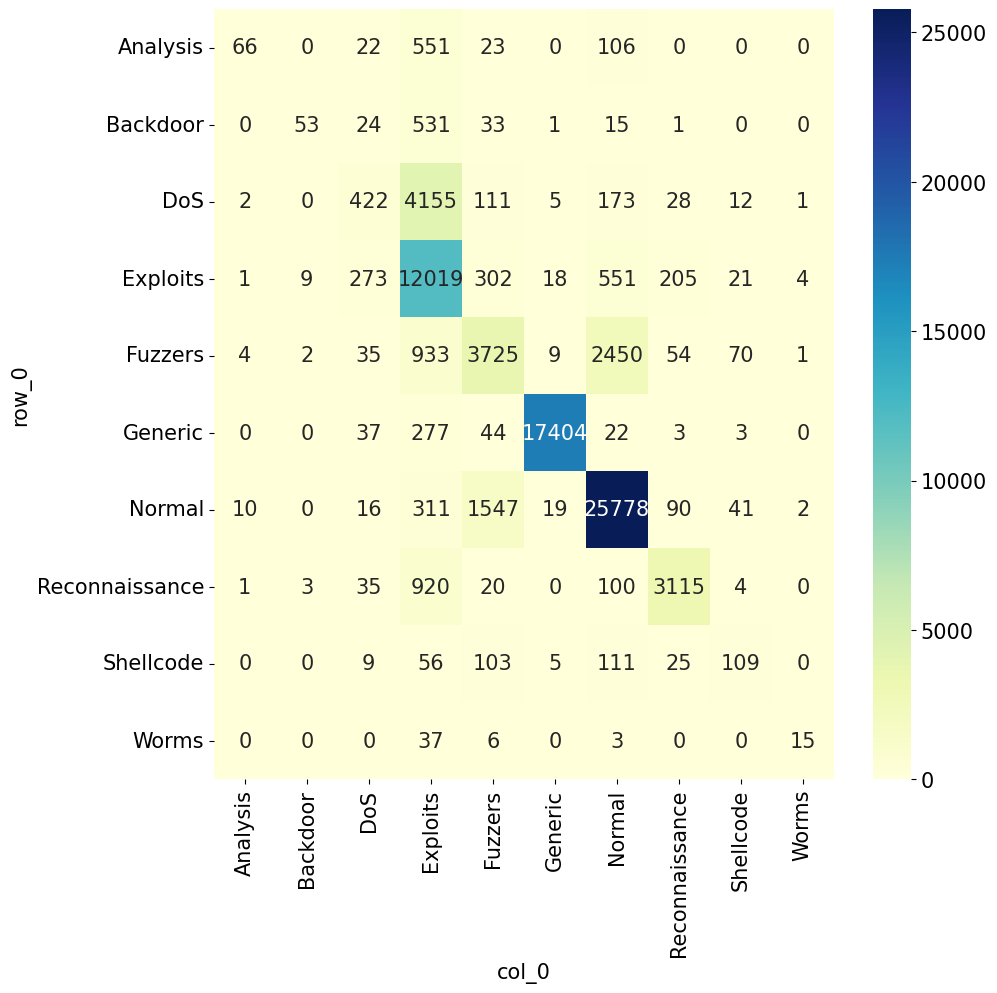

In [46]:
top10= feature_imp.Name[:10].tolist()

X = df.loc[:, df.columns.isin(top10)]

y = df['attack_cat'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

rf = RandomForestClassifier(random_state=11,min_samples_leaf= 1, min_samples_split= 5, n_estimators= 100)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

report = classification_report(y_test, y_pred)
print(report)

cross = pd.crosstab(y_test,  y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(cross, annot=True,fmt='d', cmap="YlGnBu")
plt.show()



    Generic, Normal, and Exploits attacks have high recalls.

    The cross-tabulation is a table that shows the frequency of each combination of labels. The heatmap uses different shades of blue to indicate the frequency, with darker colors representing higher frequencies. The heatmap also shows the exact numbers in each cell.

The heatmap can help you evaluate the performance of your classifier by showing how well it predicts each class. You can also see which classes are most often confused with each other. For example, in your heatmap, you can see that the classifier correctly predicts most of the “Normal” and “Generic” attacks, but has some difficulty with the “Exploits” and “Fuzzers” attacks.



Accuracy:  0.7239786810173088


/home/Moraa/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/home/Moraa/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/home/Moraa/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


                precision    recall  f1-score   support

      Analysis       0.00      0.00      0.00       768
      Backdoor       0.00      0.00      0.00       658
           DoS       0.00      0.00      0.00      4909
      Exploits       0.52      0.84      0.64     13403
       Fuzzers       0.41      0.10      0.17      7283
       Generic       0.94      0.97      0.96     17790
        Normal       0.75      0.93      0.83     27814
Reconnaissance       0.91      0.19      0.31      4198
     Shellcode       0.00      0.00      0.00       418
         Worms       0.00      0.00      0.00        61

      accuracy                           0.72     77302
     macro avg       0.35      0.30      0.29     77302
  weighted avg       0.66      0.72      0.66     77302



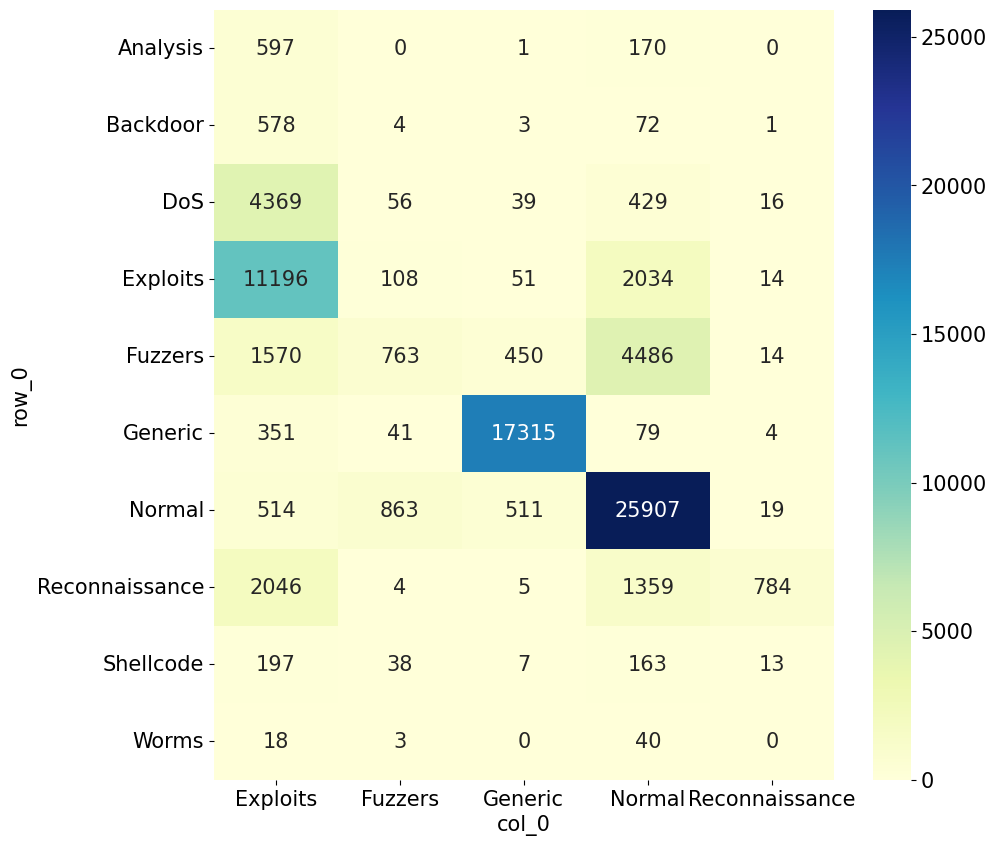

In [49]:
top10= feature_imp.Name[:10].tolist()

X = df.loc[:, df.columns.isin(top10)]

y = df['attack_cat'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

rf = rf_best

rf.fit(X_train, y_train)






y_pred = rf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

report = classification_report(y_test, y_pred)
print(report)

from sklearn.metrics import precision_score, f1_score

# # Assuming y_true is your true labels and y_pred is your predicted labels
# y_true = y_test
# precision = precision_score(y_true, y_pred, zero_division=0)
# f1 = f1_score(y_true, y_pred, zero_division=0)


cross = pd.crosstab(y_test,  y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(cross, annot=True,fmt='d', cmap="YlGnBu")
plt.show()

In [ ]:
top10= feature_imp.Name[:10].tolist()

X = df.loc[:, df.columns.isin(top10)]

y = df['attack_cat'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

rf = rf_best

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

report = classification_report(y_test, y_pred)
print(report)

from sklearn.metrics import precision_score, f1_score

# # Assuming y_true is your true labels and y_pred is your predicted labels
# y_true = y_test
# precision = precision_score(y_true, y_pred, zero_division=0)
# f1 = f1_score(y_true, y_pred, zero_division=0)


cross = pd.crosstab(y_test,  y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(cross, annot=True,fmt='d', cmap="YlGnBu")
plt.show()

XGBOOST

In [ ]:
# Create an XGBoost model


from xgboost import XGBClassifier, plot_importance
xgb = XGBClassifier(n_estimators=200, max_depth=10, learning_rate=0.1, objective='binary:logistic', random_state=11) # Use 200 trees, 10 levels of depth, 0.1 learning rate, binary logistic objective function, and a fixed seed for reproducibility

# Fit the model to the training data
xgb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred) # Use accuracy as the metric to measure how well the model predicts the labels
print("Accuracy: ", accuracy)

# Plot the feature importance of the model
plt.figure(figsize=(15, 10))
plot_importance(xgb)
plt.xlabel('F score')
plt.ylabel('Features')
plt.title('Feature importance')
plt.show()

Neural Network

In [ ]:
# Import modules
from sklearn.neural_network import MLPClassifier # Use the MLPClassifier class from scikit-learn



# Create a neural network model
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=200, random_state=11) # Use two hidden layers with 100 and 50 neurons each, relu activation function, adam optimizer, 200 iterations, and a fixed seed for reproducibility

# Fit the model to the training data
mlp.fit(X_train, y_train)

# Make predictions on the test data
y_pred = mlp.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred) # Use accuracy as the metric to measure how well the model predicts the labels
print("Accuracy: ", accuracy)

# Plot the loss curve of the model
plt.figure(figsize=(15, 10))
plt.plot(mlp.loss_curve_)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss curve')
plt.show()


Traffic partss yay

captures packets in real-time from the specified network interface on your system using the Pyshark library. This allows you to scan all incoming traffic from the network interface and extract the specified features from each captured packet.
 

 PyShark [8] is a Python wrapper for Tshark [10]. It simply uses its ability to export XML data using its parsing. Tshark itself is the command-line version of Wireshark. Both Tshark and PyShark depend on the Pcap library that actually captures network packages and is maintained under the hood of Tcpdump 

In [ ]:
# import pyshark

# # specify the network interface to capture packets from
# #traffic coming in from my network interface  
# interface = 'eth0'

# # create a capture object
# capture = pyshark.LiveCapture(interface=interface)

# # specify the features to extract and their corresponding dataset feature names
# features = [
#     ('ip.src', 'srcip'),
#     ('ip.dst', 'dstip'),
#     ('tcp.srcport', 'sport'),
#     ('tcp.dstport', 'dport'),
  
# ]

# # iterate over captured packets
# for packet in capture.sniff_continuously():
#     # create a dictionary to store the extracted and transformed features
#     packet_features = {}
    
#     # iterate over the specified features
#     # for feature, dataset_feature in features:
#     #     # extract the feature value from the packet
#     #     value = packet[layer].get(field) for layer, field in feature.split('.')
        
#     #     # transform the extracted value to match the corresponding feature in your dataset
#     #     transformed_value = transform_value(value, dataset_feature)
        
#     #     # store the transformed value in the dictionary
#     #     packet_features[dataset_feature] = transformed_value
    
#     # pass the extracted and transformed features to your trained model for classification
#     classification = model.predict(packet_features)
    
#     # if the packet is classified as anomalous, then necxt part web app using stream lit 
#     if classification == 1:
#         print(f'Anomalous packet detected: {packet}')


In [ ]:
# import pyshark

# # specify the network interface to capture packets from
# interface = 'wlan0'

# # create a capture object
# capture = pyshark.LiveCapture(interface=interface)

# # iterate over captured packets
# for packet in capture.sniff_continuously():
#     # print the captured packet
#     print(packet)

# import pyshark
# import threading

# # specify the network interface to capture packets from
# interface = 'wlan0'

# # create a capture object
# capture = pyshark.LiveCapture(interface=interface)

# def capture_packets():
#     # iterate over captured packets
#     for packet in capture.sniff_continuously():
#         # print the captured packet
#         print(packet)

# # create and start a thread to run the packet capture and processing code
# t = threading.Thread(target=capture_packets)
# t.start()
